# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name:  Chris Kollbaum

https://github.com/kollbaumc/module7webmining

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

# Answer Question 1

In [2]:

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


In [3]:
import requests
results = requests.get('https://www.desmoinesregister.com/story/sports/college/iowa/basketball-men/2022/12/07/iowa-basketball-big-stage-loss-to-duke-at-jimmy-v-classic-madison-square-garden-kris-murray/69692172007/')
print(results.status_code)
print(results.headers['content-type'])
from bs4 import BeautifulSoup
parser = 'html.parser'
soup = BeautifulSoup(results.text, parser)
for header in soup.findAll('h1'):
    print('h1 header:', header)
    print('h1 text:', header.text)

200
text/html; charset=utf-8
h1 header: <h1 class="gnt_ar_hl" elementtiming="ar-headline">Jimmy V Classic: Cold-shooting Iowa flops in big-stage loss to No. 15 Duke</h1>
h1 text: Jimmy V Classic: Cold-shooting Iowa flops in big-stage loss to No. 15 Duke


In [4]:
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(results.text, f)
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

# Answer Question 2

In [5]:
s = BeautifulSoup(article_html, parser)
article_element = s.find('article')
print(article_element.get_text())

IOWA MEN'S BASKETBALLJimmy V Classic: Cold-shooting Iowa flops in big-stage loss to No. 15 Duke Chad LeistikowDes Moines RegisterView CommentsView CommentsNEW YORK − The Jimmy V Classic tussle between Iowa and Duke didn’t tip off until after 10 p.m. Eastern time, and for most of the game it seemed like the Hawkeyes were past their bedtime.A pro-Duke crowd of 17,828 at Madison Square Garden saw the 15th-ranked Blue Devils take advantage of a listless performance from No. 24-ranked Iowa and rolled to a 74-62 win. Duke fans chanted, "Our house!" as the game wound to its merciful conclusion.This was Iowa's first game against Duke in 21 years, and it was not the type of national-TV splash Fran McCaffery's Hawkeyes wanted to make on ESPN at the World's Most Famous Arena. And so it remains, the Hawkeyes' only win in nine tries vs. blueblood Duke was at the 1994 Rainbow Classic in Hawaii.A cold-shooting trend that started during an Emerald Coast Classic split (vs. Clemson and TCU) continued fo

In [6]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print('This is the polarity of my article.')
print(f'Polarity: {doc._.polarity}')




with open('python-match.pkl') as f: 
    sentence_tokens = [[token.text for token in sent] for sent in doc.sents]
    print(f'The are {len(sentence_tokens)} sentences in the article.')



This is the polarity of my article.
Polarity: 0.08600088183421513
The are 39 sentences in the article.


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

# Answer Question 3

In [7]:
t = [token.text.lower() for token in doc if token.is_stop != True and token.is_punct != True and token.is_space != True]   
from collections import Counter
word_freq = Counter(t)
common_tokens = word_freq.most_common(5)
print('These are the common tokens in the text.')
for word in common_tokens:
    print(word[0])
print('Here are the most common tokens with the frequency.')
print(common_tokens)

These are the common tokens in the text.
iowa
duke
hawkeyes
3
points
Here are the most common tokens with the frequency.
[('iowa', 17), ('duke', 10), ('hawkeyes', 9), ('3', 7), ('points', 7)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

# Answer Question 4

In [8]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)


lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(lemmas)
common_lemmas = lemma_freq.most_common(5)
print('Here are the most common lemmas.')
for lemmas in common_lemmas:
    print(lemmas[0])
print('These are the most common lemmas in the text with the frequency.')
print(lemma_freq.most_common(5))

Here are the most common lemmas.
iowa
point
duke
hawkeyes
shot
These are the most common lemmas in the text with the frequency.
[('iowa', 17), ('point', 13), ('duke', 10), ('hawkeyes', 9), ('shot', 8)]


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Answer Question 5

In [9]:
high_tokens = ['iowa', 'duke', 'hawkeyes', '3', 'points']
sentences = list(doc.sents)
#Finding the word count of a sentence.
def wordCount(sentence):
    for count in sentences:
        count1 = 0
        for token in sentence:
            if not (token.is_space or token.is_punct):
                count1 +=1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    return count1


#Here is our function that gives the score.        
def score_sentence_by_tokens(sentence, interesting_token):
    for count in sentences:
        count3 = 0 
        for token in sentence:
            if (token.text.lower() in interesting_token):
                count3 +=1
    return count3/wordCount(sentence)

results = list()
for i in range(len(sentences)):
    results.append(score_sentence_by_tokens(sentences[i], high_tokens))
print('Here is a list of all the scores for each sentence in the article.')    
print(results)


Here is a list of all the scores for each sentence in the article.
[0.11538461538461539, 0.08823529411764706, 0.058823529411764705, 0.2, 0.0, 0.08108108108108109, 0.09090909090909091, 0.10344827586206896, 0.07692307692307693, 0.05263157894736842, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.1, 0.1388888888888889, 0.1, 0.058823529411764705, 0.0, 0.0, 0.15789473684210525, 0.09523809523809523, 0.1, 0.1, 0.06451612903225806, 0.0, 0.0, 0.038461538461538464, 0.037037037037037035, 0.08695652173913043, 0.08, 0.1875, 0.0625]


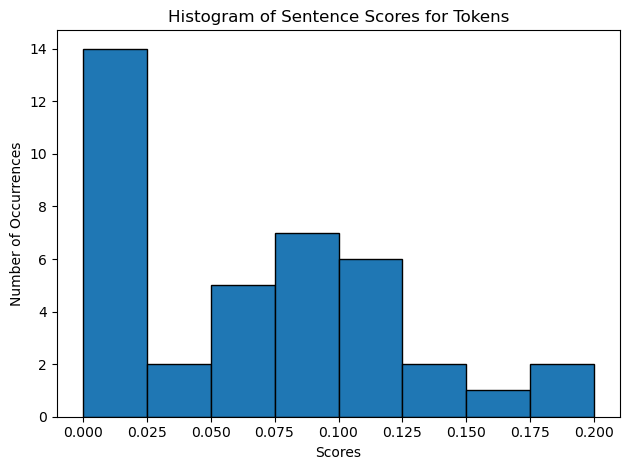

In [10]:
plt.hist(results, bins = 8, edgecolor = 'black')
plt.title('Histogram of Sentence Scores for Tokens')
plt.xlabel('Scores')
plt.ylabel('Number of Occurrences')
plt.tight_layout()

#The most common range of scores for the top 5 tokens in a sentence is from 0.0 to 0.025.  


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

# Answer Question 6

In [11]:
high_lemmas = ['iowa', 'point', 'duke', 'hawkeyes', 'shot']

def score_sentence_by_lemma(sentence, interesting_lemma):
    for count in sentences:
        count3 = 0 
        for token in sentence:
            if (token.lemma_.lower() in interesting_lemma):
                count3 +=1
    return count3/wordCount(sentence)

results1 = list()
for i in range(len(sentences)):
    results1.append(score_sentence_by_lemma(sentences[i], high_lemmas))
print('Here is a list of all the lemma scores for each sentence in the article.')    
print(results1)

Here is a list of all the lemma scores for each sentence in the article.
[0.11538461538461539, 0.08823529411764706, 0.058823529411764705, 0.2, 0.0, 0.08108108108108109, 0.09090909090909091, 0.10344827586206896, 0.07692307692307693, 0.15789473684210525, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.1, 0.1388888888888889, 0.1, 0.058823529411764705, 0.0, 0.1111111111111111, 0.15789473684210525, 0.09523809523809523, 0.1, 0.1, 0.12903225806451613, 0.0, 0.0, 0.038461538461538464, 0.07407407407407407, 0.08695652173913043, 0.08, 0.1875, 0.0625]


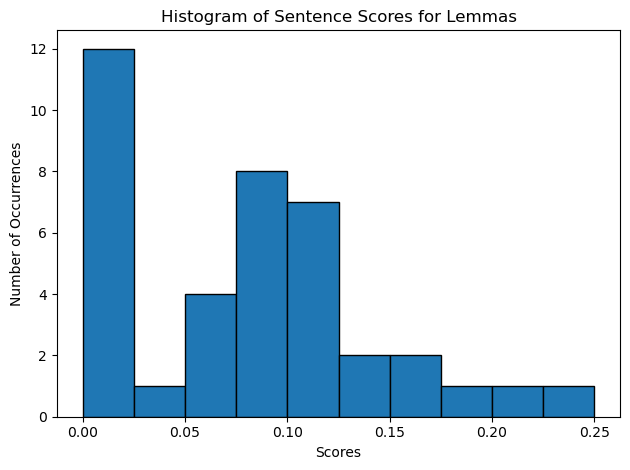

In [12]:
plt.hist(results1, bins = 10, edgecolor = 'black')
plt.title('Histogram of Sentence Scores for Lemmas')
plt.xlabel('Scores')
plt.ylabel('Number of Occurrences')
plt.tight_layout()

#The most common score for lemmas in a sentence is from 0.0 to 0.025.

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

# Answer Question 7

My cutoff score for tokens is 0.11.    
The cutoff score for lemmas is 0.125.

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

# Answer Question 8

In [13]:
results = list()
for i in range(len(sentences)):
    if score_sentence_by_tokens(sentences[i], high_tokens) > .11:
         results.append(score_sentence_by_tokens(sentences[i], high_tokens))
        
print('I played around with the cutoff score so I would have at least six sentences.')       
print(results)

I played around with the cutoff score so I would have at least six sentences.
[0.11538461538461539, 0.2, 0.125, 0.1388888888888889, 0.15789473684210525, 0.1875]


In [38]:
summary = []
for sentence in sentences:
    if (score_sentence_by_tokens(sentence, high_tokens)>.11):
        summary.append(str(sentence))
print(summary)


["IOWA MEN'S BASKETBALLJimmy V Classic: Cold-shooting Iowa flops in big-stage loss to No. 15 Duke Chad LeistikowDes Moines RegisterView CommentsView CommentsNEW YORK −", 'Duke fans chanted, "Our house!"', '”“I don’t remember a really bad 3. ...', 'Mark Mitchell, who did a nice job defending Iowa star Kris Murray, scored 17.Patrick McCaffery (12 points), Dasonte Bowen (12 points, all in the second half) and Filip Rebraca (10 points) led the Hawkeyes in scoring.', 'The Hawkeyes were allowing Duke, a team that shoots 30.5% from 3-point range, a lot of open looks.', 'Iowa next faces Iowa State in quick-turnaround game at 7 p.m. Thursday in Iowa City.']


In [40]:
iowatext = ' '.join(summary)
print(iowatext)



IOWA MEN'S BASKETBALLJimmy V Classic: Cold-shooting Iowa flops in big-stage loss to No. 15 Duke Chad LeistikowDes Moines RegisterView CommentsView CommentsNEW YORK − Duke fans chanted, "Our house!" ”“I don’t remember a really bad 3. ... Mark Mitchell, who did a nice job defending Iowa star Kris Murray, scored 17.Patrick McCaffery (12 points), Dasonte Bowen (12 points, all in the second half) and Filip Rebraca (10 points) led the Hawkeyes in scoring. The Hawkeyes were allowing Duke, a team that shoots 30.5% from 3-point range, a lot of open looks. Iowa next faces Iowa State in quick-turnaround game at 7 p.m. Thursday in Iowa City.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

# Answer Question 9

In [41]:
def polarity_score(f):
    import json
    import spacy
    from spacytextblob.spacytextblob import SpacyTextBlob
    
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    dociowa= nlp(iowatext)
    print(dociowa._.blob.polarity)
print('This is the polarity score for the summary text of my article.')
polarity_score('summary')

This is the polarity score for the summary text of my article.
-0.05729166666666666


In [45]:
dociowa = nlp(iowatext)
sentence_tokensiowa = [[token.text for token in sent] for sent in dociowa.sents]
print(f'The are {len(sentence_tokensiowa)} sentences in the summary.')

The are 6 sentences in the summary.


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

# Answer Question 10

In [133]:
results1 = list()
for i in range(len(sentences)):
    if score_sentence_by_lemma(sentences[i], high_lemmas)>.125:
        results1.append(score_sentence_by_lemma(sentences[i], high_lemmas))
print(results1)
    

[0.2, 0.15789473684210525, 0.25, 0.1388888888888889, 0.15789473684210525, 0.12903225806451613, 0.1875]


In [23]:
summary1 = []
for sentence in sentences:
    if (score_sentence_by_lemma(sentence, high_lemmas)>.125):
        summary1.append(str(sentence))
print(summary1)


['Duke fans chanted, "Our house!"', 'Iowa coach Fran McCaffery chalked the night up as a bad one with shots but not with shot selection.', 'We got good shots.', 'Mark Mitchell, who did a nice job defending Iowa star Kris Murray, scored 17.Patrick McCaffery (12 points), Dasonte Bowen (12 points, all in the second half) and Filip Rebraca (10 points) led the Hawkeyes in scoring.', 'The Hawkeyes were allowing Duke, a team that shoots 30.5% from 3-point range, a lot of open looks.', 'Duke’s lead grew to 36-24 after making six straight shots at one point, but the Hawkeyes buckled down on defense to chip away at the lead before the break.', 'Iowa next faces Iowa State in quick-turnaround game at 7 p.m. Thursday in Iowa City.']


In [34]:
my_text = ' '.join(summary1)
print(my_text)

Duke fans chanted, "Our house!" Iowa coach Fran McCaffery chalked the night up as a bad one with shots but not with shot selection. We got good shots. Mark Mitchell, who did a nice job defending Iowa star Kris Murray, scored 17.Patrick McCaffery (12 points), Dasonte Bowen (12 points, all in the second half) and Filip Rebraca (10 points) led the Hawkeyes in scoring. The Hawkeyes were allowing Duke, a team that shoots 30.5% from 3-point range, a lot of open looks. Duke’s lead grew to 36-24 after making six straight shots at one point, but the Hawkeyes buckled down on defense to chip away at the lead before the break. Iowa next faces Iowa State in quick-turnaround game at 7 p.m. Thursday in Iowa City.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

# Answer Question 11

In [35]:
def polarity_score(f):
    import spacy
    from spacytextblob.spacytextblob import SpacyTextBlob
    
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    doc1 = nlp(my_text)
    print(doc1._.blob.polarity)
print('This is the polarity score with lemmas for the summary text of my article.')
polarity_score('summary1')

This is the polarity score with lemmas for the summary text of my article.
0.007777777777777795


In [47]:
doc1 = nlp(my_text)
sentence_tokens = [[token.text for token in sent] for sent in doc1.sents]
print(f'The are {len(sentence_tokens)} sentences in the lemmas summary.')

The are 7 sentences in the lemmas summary.


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is a difference in polarity.  Overall the polarity of the article is positive with the summary with top tokens having a negative polarity and the summary with top lemmas having a polarity close to zero.  I would expect the polarities to be negative because it was an article from an Iowa perspective after a loss, but I do see in the overall article words such as nice, good and other positive words probably bring up the polarity score.  However, in the first summary it make sense that this text would have a negative polarity score with such words as bad, flop, and other negative words.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Like I previously stated, I would have expected the polarity of the article to be negative.  I don't really know why, but I feel since the summary with the top tokens is negative, it is more representative of what the polarity should be.  I don't really see any negative words in my top tokens, so it must have randomly picked out sentences with words that have negative polarity or connotation.  